In [14]:
%matplotlib inline

In [5]:
import pandas as pd

movies_df = pd.read_csv("PythonPandasTutorialACompleteIntroductionForBeginners/IMDB-Movie-Data.csv", index_col="Title")

In [6]:
movies_df.head() #prints out a few rows to keep as a visual reference.
#movies_df.tail(2) #in this case we printing the bottom two rows.
#movies_df.info() #provides the essential details about your dataset.

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [17]:
#HANDLING DUPLICATES
movies_df.shape #outputs just a tuple of (rows, columns).   Output: (1000, 11)

#Duplicates:
temp_df = movies_df.append(movies_df) # make a new copy.
#our DataFrame rows have doubled.

# drop_duplicates returns a copy of your DataFrame, but this time with duplicates removed.
#inplace=True will modify the DataFrame object in place
#keep=first: (default) Drop duplicates except for the first occurrence.
#keep=last: Drop duplicates except for the last occurrence.
#keep=False: Drop all duplicates.
temp_df.drop_duplicates(inplace=True, keep=False)

temp_df.shape

(0, 11)

In [18]:
#COLUMN CLEANUP: It's a good idea to lowercase, remove special characters, and replace spaces with underscores if you'll be working with a dataset for some time.
movies_df.columns
movies_df.rename(columns={ #via a dict
        'Runtime (Minutes)': 'Runtime', 
        'Revenue (Millions)': 'Revenue_millions'
    }, inplace=True)
movies_df.columns #Prints the column names.

#Change columns directly.
movies_df.columns = ['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime', 
                     'rating', 'votes', 'revenue_millions', 'metascore']
movies_df.columns

movies_df.columns = [col.lower() for col in movies_df]
movies_df.columns

Index(['rank', 'genre', 'description', 'director', 'actors', 'year', 'runtime',
       'rating', 'votes', 'revenue_millions', 'metascore'],
      dtype='object')

In [19]:
#WORKING WITH MISSING VALUES: Get rid of rows or columns with nulls OR Replace nulls with non-null values, a technique known as imputation
movies_df.isnull() #checks which cells in our DataFrame are null.
movies_df.isnull().sum() #counts the number of nulls in each column.

movies_df.dropna() #removes nulls (deletes any row where null values are found).
movies_df.dropna(axis=1) #it removes columns instead of rows. As we learned above,
#this is a tuple that represents the shape of the DataFrame, i.e. 1000 rows and 11 columns.
#Note that the rows are at index zero of this tuple and columns are at index one of this tuple.
#This is why axis=1 affects columns. This comes from NumPy, and is a great example of why learning NumPy is worth your time.

#Imputation: There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the mean or the median of that column.
revenue = movies_df['revenue_millions'] #Let's look at imputing the missing values in the revenue_millions column. First we'll extract that column into its own variable.
#revenue now contains a series.
revenue.head() #Slightly different formatting than a DataFrame, but we still have our Title index.
revenue_mean = revenue.mean() #We'll impute the missing values of revenue using the mean.
revenue_mean
revenue.fillna(revenue_mean, inplace=True) #replace all nulls in revenue with the mean of the column. By using inplace=True we have actually affected the original movies_df.
movies_df.isnull().sum() #checks how many null values are now (0 means we´ve done it correctly)
#Anyway, it would be a better idea to find the mean of the revenue generated in each genre individually and impute the nulls in each genre with that genre's mean.

rank                 0
genre                0
description          0
director             0
actors               0
year                 0
runtime              0
rating               0
votes                0
revenue_millions     0
metascore           64
dtype: int64

In [20]:
#UNDERSTANDING YOUR VALUES
movies_df.describe() #gets a summary of the distribution of continuous variables.
movies_df['genre'].describe() #can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category.
movies_df['genre'].value_counts().head(10) #.value_counts() can tell us the frequency of all values in a column.

Action,Adventure,Sci-Fi       50
Drama                         48
Comedy,Drama,Romance          35
Comedy                        32
Drama,Romance                 31
Comedy,Drama                  27
Action,Adventure,Fantasy      27
Animation,Adventure,Comedy    27
Comedy,Romance                26
Crime,Drama,Thriller          24
Name: genre, dtype: int64

In [21]:
#CORRELATION
movies_df.corr() #relationship between each continuous variable.

,rank,year,runtime,rating,votes,revenue_millions,metascore
rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.252996,-0.191869
year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.117562,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.247834,0.211978
rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.189527,0.631897
votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.607941,0.325684
revenue_millions,-0.252996,-0.117562,0.247834,0.189527,0.607941,1.000000,0.133328
metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.133328,1.000000


In [22]:
#DATA FRAME SLICING, SELECTING, EXTRACTING
#Extract a column using brackets. This will return a Series.
genre_col = movies_df['genre']
type(genre_col)
#To extract a column as a DataFrame, you need to pass a list of column names.
genre_col = movies_df[['genre']]
type(genre_col)
subset = movies_df[['genre', 'rating']] #adding another column name.
subset.head()

#Getting data by rows: .loc locates by name and .iloc locates by numerical index
prom = movies_df.loc["Prometheus"]
prom
prom = movies_df.iloc[1] #we give it the numerical index of Prometheus.
    #Select multiple rows
movie_subset = movies_df.loc['Prometheus':'Sing']
movie_subset = movies_df.iloc[1:4]
movie_subset

#Conditional selections: boolean conditions
condition = (movies_df['director'] == "Ridley Scott")
condition.head()
#We want to filter out all movies not directed by Ridley Scott, in other words, we don’t want the False films.
movies_df[movies_df['director'] == "Ridley Scott"] #pass this operation into the DataFrame.
#Similar to SELECT movies_df WHERE movies_df director EQUALS Ridley Scott.
movies_df[movies_df['rating'] >= 8.6].head(3) #using numerical values by filtering the DataFrame by ratings.
#Let's filter the the DataFrame to show only movies by Christopher Nolan OR Ridley Scott using  logical operators | for "or" and & for "and":
movies_df[(movies_df['director'] == 'Christopher Nolan') | (movies_df['director'] == 'Ridley Scott')].head()
#Group evaluations with parentheses so Python knows how to evaluate the conditional.
movies_df[movies_df['director'].isin(['Christopher Nolan', 'Ridley Scott'])].head()
#Example: movies that were released between 2005 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.
movies_df[
    ((movies_df['year'] >= 2005) & (movies_df['year'] <= 2010))
    & (movies_df['rating'] > 8.0)
    & (movies_df['revenue_millions'] < movies_df['revenue_millions'].quantile(0.25))
]

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [23]:
#APLYING FUNCTIONS: instead of iterating over a DataFrame or Series.
#Create a function that, when given a rating, determines if it's good or bad:
def rating_function(x):
    if x >= 8.0:
        return "good"
    else:
        return "bad"
#Now we want to send the entire rating column through this function:
movies_df["rating_category"] = movies_df["rating"].apply(rating_function)
movies_df.head(2)
#This lambda function achieves the same result as rating_function:
movies_df["rating_category"] = movies_df["rating"].apply(lambda x: 'good' if x >= 8.0 else 'bad')
movies_df.head(2)
#Overall, using apply() will be much faster than iterating manually over rows because pandas is utilizing vectorization.

,rank,genre,description,director,actors,year,runtime,rating,votes,revenue_millions,metascore,rating_category
Title,,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,good
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,bad


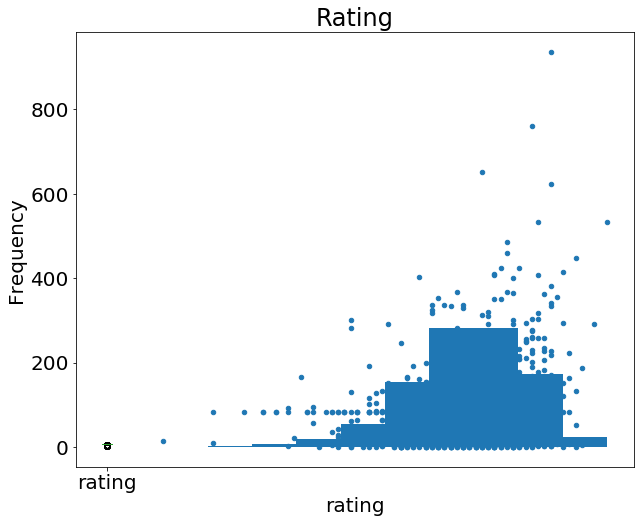

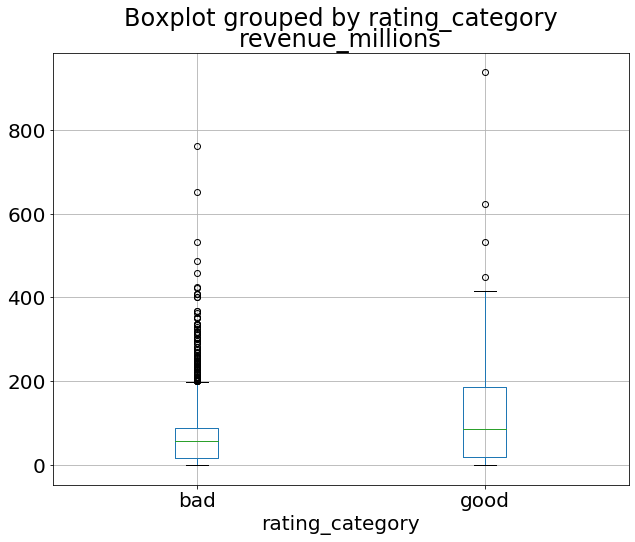

In [24]:
#PLOTTING: For categorical variables utilize Bar Charts* and Boxplots. For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)}) # set font and plot size to be larger
#Let's plot the relationship between ratings and revenue:
movies_df.plot(kind='scatter', x='rating', y='revenue_millions', title='Revenue (millions) vs Rating');
#Histogram based on a single column:
movies_df['rating'].plot(kind='hist', title='Rating');
#Boxplot:
movies_df['rating'].describe()
movies_df['rating'].plot(kind="box");
movies_df.boxplot(column='revenue_millions', by='rating_category'); #Boxplot of revenue that is grouped by the Rating Category we created above.